In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N_THETA = 20
N_PHI = int(N_THETA / 2)
R = 1

# Simulating the manifold
We sample points and tangent vectors from the sphere.

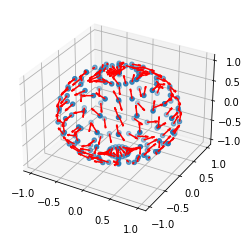

In [3]:
# Parameters for S^2
theta = np.linspace(0, 2*np.pi, N_THETA)
phi = np.linspace(0, np.pi, N_PHI)
thetav, phiv = np.meshgrid(theta, phi, indexing = 'ij')

# Generate points on the sphere
xx = R * np.cos(phiv.flatten()) * np.sin(thetav.flatten())
yy = R * np.sin(phiv.flatten()) * np.sin(thetav.flatten())
zz = R * np.cos(thetav.flatten())
pointcloud = np.rollaxis(np.array([xx, yy, zz]), 1)

# Generate tangent vectors to the sphere
uu = yy
vv = xx
ww = -2 * xx * yy / zz

# Plot manifold and corresponding vector field
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(xx, yy, zz)
ax.quiver(xx, yy, zz, uu, vv, ww, length=0.2, normalize=True, color='r')
plt.show()

# Finding the nearest triangulation

We pick a point that isn't a sampled node, and we find the simplex that it is nearest to. By the triangulation property, the simplex will be the three closest nodes.

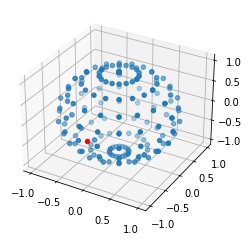

In [4]:
# Pick a point that isn't on the triangulation
thetar = np.pi/2
phir = 3*np.pi/2
xr = R * np.cos(phir) * np.sin(thetar)
yr = R * np.sin(phir) * np.sin(thetar)
zr = R * np.cos(thetar)
pr = np.array([xr, yr, zr])

ax = plt.figure().add_subplot(projection='3d')
ax.scatter(xx, yy, zz)
ax.scatter(xr, yr, zr, c='r')
plt.show()

In [5]:
%%time

# Find closest 3 points
dvs = pointcloud - pr
dists = np.linalg.norm(dvs, axis=1)
order = np.argsort(dists)
i, j, k = order[0:3]

CPU times: user 175 µs, sys: 100 µs, total: 275 µs
Wall time: 167 µs


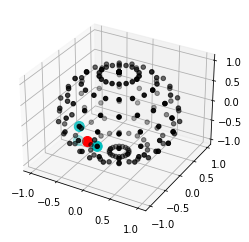

In [6]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(xx, yy, zz, c='k')
ax.scatter(np.array([xx[i], xx[j], xx[k]]),
           np.array([yy[i], yy[j], yy[k]]),
           np.array([zz[i], zz[j], zz[k]]),
           c='c', s=100)
ax.scatter(xr, yr, zr, c='r', s=100)
plt.show()